In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [80]:
df=pd.read_csv("/content/Book file2.csv")

In [78]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr̩,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr̩,4.49,439358078,9.780000e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr̩,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr̩,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [81]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
88,151,Anna Karenina,Leo Tolstoy/Richard Pevear/Larissa Volokhonsky,4.05,143035002,9.780000e+12,eng,838,16643,1851,5/31/2004,Penguin Classics
89,152,Anna Karenina,Leo Tolstoy/David Magarshack/Priscilla Meyer,4.05,451528611,9.780000e+12,eng,960,109420,5696,11/5/2002,Signet
90,153,Anna Karenina,Leo Tolstoy/Richard Pevear/Larissa Volokhonsky...,4.05,140449175,9.780000e+12,eng,837,2904,309,1/30/2003,Penguin Books
91,154,CliffsNotes on Tolstoy's Anna Karenina,Marianne Sturman/Leo Tolstoy,3.85,822001837,9.780000e+12,eng,80,16,3,11/26/1965,Cliffs Notes
92,155,Anna Karenina,Leo Tolstoy/Amy Mandelker/Constance Garnett,4.05,1593080271,9.780000e+12,eng,803,9564,726,7/1/2003,Barnes & Noble Classics


In [82]:
df.shape

(93, 12)

In [83]:
df.columns = df.columns.str.strip()

In [84]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [85]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [86]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,93.000000,93.000000,9.300000e+01,93.000000,9.300000e+01,93.000000
mean,76.580645,4.025161,9.780000e+12,448.827957,1.149337e+05,1929.817204
std,45.717308,0.339615,0.000000e+00,485.209270,4.434424e+05,5854.390790
min,1.000000,3.250000,9.780000e+12,6.000000,6.000000e+00,1.000000
25%,34.000000,3.830000,9.780000e+12,208.000000,7.600000e+01,16.000000
50%,77.000000,3.980000,9.780000e+12,324.000000,1.456000e+03,98.000000
75%,110.000000,4.280000,9.780000e+12,514.000000,2.615300e+04,644.000000
max,155.000000,4.780000,9.780000e+12,3342.000000,2.339585e+06,36325.000000


In [87]:
df2 = df.copy()

In [88]:
df.describe(include = 'object')

,title,authors,isbn,language_code,publication_date,publisher
count,93,93,93,93,93,93
unique,84,54,93,3,83,57
top,Anna Karenina,Bill Bryson,439785960,eng,5/3/2005,Farrar Straus and Giroux
freq,4,9,1,79,3,8


In [89]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [90]:
df.duplicated().any()

False

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              93 non-null     int64  
 1   title               93 non-null     object 
 2   authors             93 non-null     object 
 3   average_rating      93 non-null     float64
 4   isbn                93 non-null     object 
 5   isbn13              93 non-null     float64
 6   language_code       93 non-null     object 
 7   num_pages           93 non-null     int64  
 8   ratings_count       93 non-null     int64  
 9   text_reviews_count  93 non-null     int64  
 10  publication_date    93 non-null     object 
 11  publisher           93 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 8.8+ KB


In [92]:
#FEATURES ADDING

In [93]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [94]:
df.isbn.nunique()

93

In [95]:
df.isbn13.nunique()

1

In [96]:
df.drop(['bookID', 'isbn', 'isbn13'], axis = 1, inplace = True)

In [97]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [99]:
df.publication_date

0      9/16/2006
1       9/1/2004
2      11/1/2003
3       5/1/2004
4      9/13/2004
         ...    
88     5/31/2004
89     11/5/2002
90     1/30/2003
91    11/26/1965
92      7/1/2003
Name: publication_date, Length: 93, dtype: object

In [100]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2] if len(x) > 2 else None)

In [101]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr̩,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr̩,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr̩,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr̩,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [102]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [103]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [104]:
df['year'].dtype
df['year'] = df['year'].astype(float)
df['year'].min()

1965.0

In [105]:
df['year'].dtype
df['year'] = df['year'].astype(float)
df['year'].max()

2012.0

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [107]:
import pandas as pd
data = pd.read_csv("/content/Book file2.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              93 non-null     int64  
 1   title               93 non-null     object 
 2   authors             93 non-null     object 
 3   average_rating      93 non-null     float64
 4   isbn                93 non-null     object 
 5   isbn13              93 non-null     float64
 6   language_code       93 non-null     object 
 7     num_pages         93 non-null     int64  
 8   ratings_count       93 non-null     int64  
 9   text_reviews_count  93 non-null     int64  
 10  publication_date    93 non-null     object 
 11  publisher           93 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 8.8+ KB


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              93 non-null     int64  
 1   title               93 non-null     object 
 2   authors             93 non-null     object 
 3   average_rating      93 non-null     float64
 4   isbn                93 non-null     object 
 5   isbn13              93 non-null     float64
 6   language_code       93 non-null     object 
 7     num_pages         93 non-null     int64  
 8   ratings_count       93 non-null     int64  
 9   text_reviews_count  93 non-null     int64  
 10  publication_date    93 non-null     object 
 11  publisher           93 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 8.8+ KB


In [109]:
for column in data.columns:
    if data[column].dtype == "object":
        print(column)

title
authors
isbn
language_code
publication_date
publisher


In [114]:
import pandas as pd

# Assuming 'data' is a pandas DataFrame
data = data[pd.to_numeric(data['average_rating'], errors='coerce').notnull()]


In [111]:
# Define input features (X) and target variable (Y)
x = data['average_rating']
y = data['ratings_count']

# Split the data into training and testing sets (80% train, 20% test)



In [115]:
x

0     4.57
1     4.49
2     4.42
3     4.56
4     4.78
      ... 
88    4.05
89    4.05
90    4.05
91    3.85
92    4.05
Name: average_rating, Length: 93, dtype: float64

In [116]:
y

0     2095690
1     2153167
2        6333
3     2339585
4       41428
       ...   
88      16643
89     109420
90       2904
91         16
92       9564
Name: ratings_count, Length: 93, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [118]:
x_train

65    3.91
15    4.07
68    3.86
78    3.50
30    3.88
      ... 
20    3.93
60    4.46
71    4.59
14    3.87
51    4.23
Name: average_rating, Length: 74, dtype: float64

In [119]:
y_train

65    38778
15    72451
68      272
78      111
30     2067
      ...  
20    28489
60       34
71    26153
14     2088
51     1341
Name: ratings_count, Length: 74, dtype: int64

In [122]:
# Assuming Y_train is a pandas Series
y_train = y_train[y_train.apply(lambda x: not isinstance(x, str))]


In [123]:
x_test

40    3.83
22    4.50
55    3.77
72    4.35
0     4.57
26    4.50
39    3.83
67    4.01
10    4.22
44    3.95
83    3.89
35    4.17
90    4.05
62    3.82
12    4.21
4     4.78
18    3.86
28    3.72
49    3.92
Name: average_rating, dtype: float64

In [124]:
y_test

40         22
22       1710
55         62
72      69167
0     2095690
26        359
39         55
67        784
10       1266
44       1630
83         17
35       1176
90       2904
62         34
12     248558
4       41428
18      48701
28     270244
49        698
Name: ratings_count, dtype: int64

In [125]:
from sklearn.linear_model import LinearRegression

In [129]:
x_train = x_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

In [130]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [134]:
import pandas as pd
print(type(x_train))
print(type(y_train))
print(x_train.dtype)
print(y_train.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
int64


In [136]:
import pandas as pd

x_train = pd.read_csv("/content/Book file2.csv")
x_train = pd.DataFrame(x_train)
print(x_train.head())
print(x_train.tail())
print(x_train.shape)

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn        isbn13  \
0  J.K. Rowling/Mary GrandPr̩            4.57   439785960  9.780000e+12   
1  J.K. Rowling/Mary GrandPr̩            4.49   439358078  9.780000e+12   
2                J.K. Rowling            4.42   439554896  9.780000e+12   
3  J.K. Rowling/Mary GrandPr̩            4.56  043965548X  9.780000e+12   
4  J.K. Rowling/Mary GrandPr̩            4.78   439682584  9.780000e+12   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng          870  

In [ ]:
#ANALYSING DATA

In [137]:
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

,title,authors,average_rating,language_code,publisher


In [138]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)

year
2004.0    19
2006.0    13
2005.0    13
2003.0    10
2002.0     7
1987.0     5
1990.0     3
1991.0     3
1994.0     3
2000.0     3
1997.0     2
1996.0     2
2001.0     2
2007.0     1
1965.0     1
1999.0     1
1982.0     1
1993.0     1
1986.0     1
1984.0     1
Name: title, dtype: int64

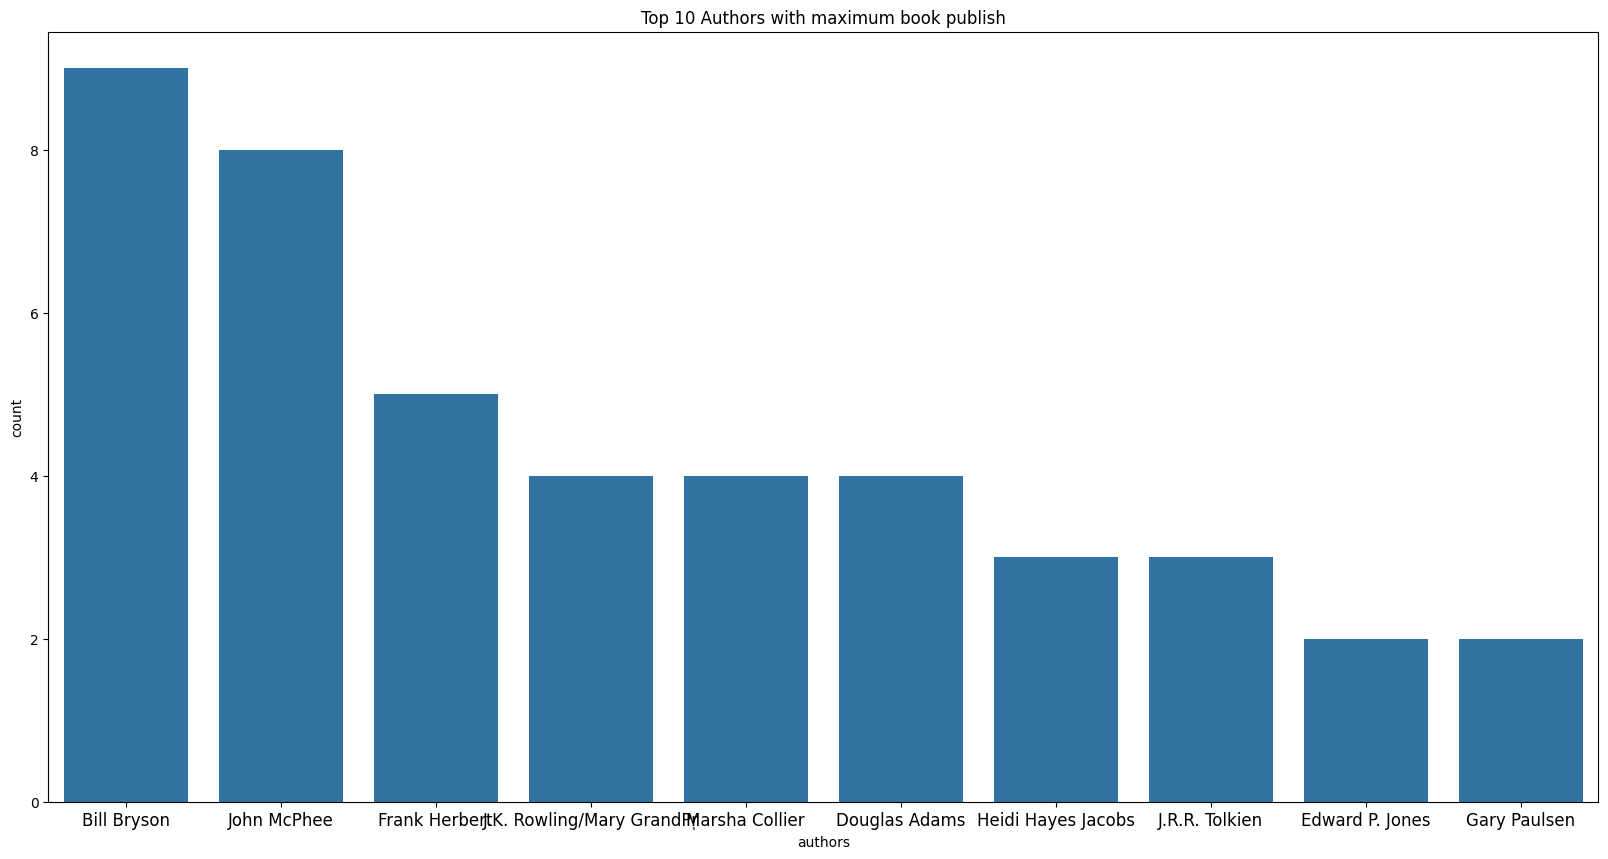

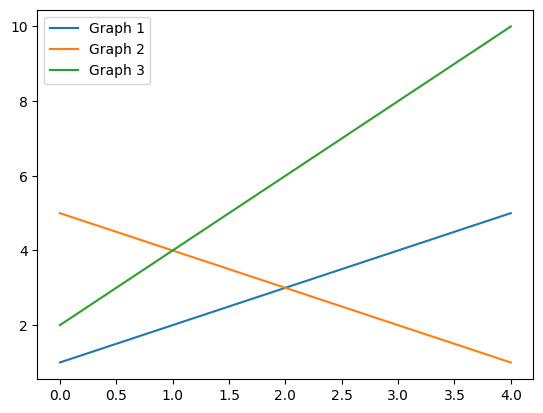

In [140]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

import matplotlib.pyplot as plt
data = {
    'Graph 1': [1, 2, 3, 4, 5],
    'Graph 2': [5, 4, 3, 2, 1],
    'Graph 3': [2, 4, 6, 8, 10],
}
colors = [plt.cm.tab10(i) for i in range(len(data))]
for i, (label, values) in enumerate(data.items()):
    plt.plot(values, color=colors[i], label=label)
plt.legend()
plt.show()


In [141]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [142]:
df.language_code.value_counts()

language_code
eng      79
en-US    13
fre       1
Name: count, dtype: int64

In [143]:
df.groupby(['language_code'])[['average_rating',
                               'ratings_count',
                               'text_reviews_count']].agg('mean').style.background_gradient(cmap = 'Wistia')


,average_rating,ratings_count,text_reviews_count
language_code,,,
en-US,3.885385,613.461538,65.846154
eng,4.049494,135191.924051,2260.316456
fre,3.920000,698.000000,52.000000


In [144]:
book = df['title'].value_counts()[:20]
book

title
Anna Karenina                                                                                      4
The Known World                                                                                    3
The Lord of the Rings (The Lord of the Rings  #1-3)                                                2
The Power of One (The Power of One  #1)                                                            2
The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)                        2
The Changeling                                                                                     2
Harry Potter and the Half-Blood Prince (Harry Potter  #6)                                          1
Getting Results with Curriculum Mapping                                                            1
Chapterhouse: Dune (Dune Chronicles #6)                                                            1
God Emperor of Dune (Dune Chronicles  #4)                                            

<ipython-input-145-dec237198d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


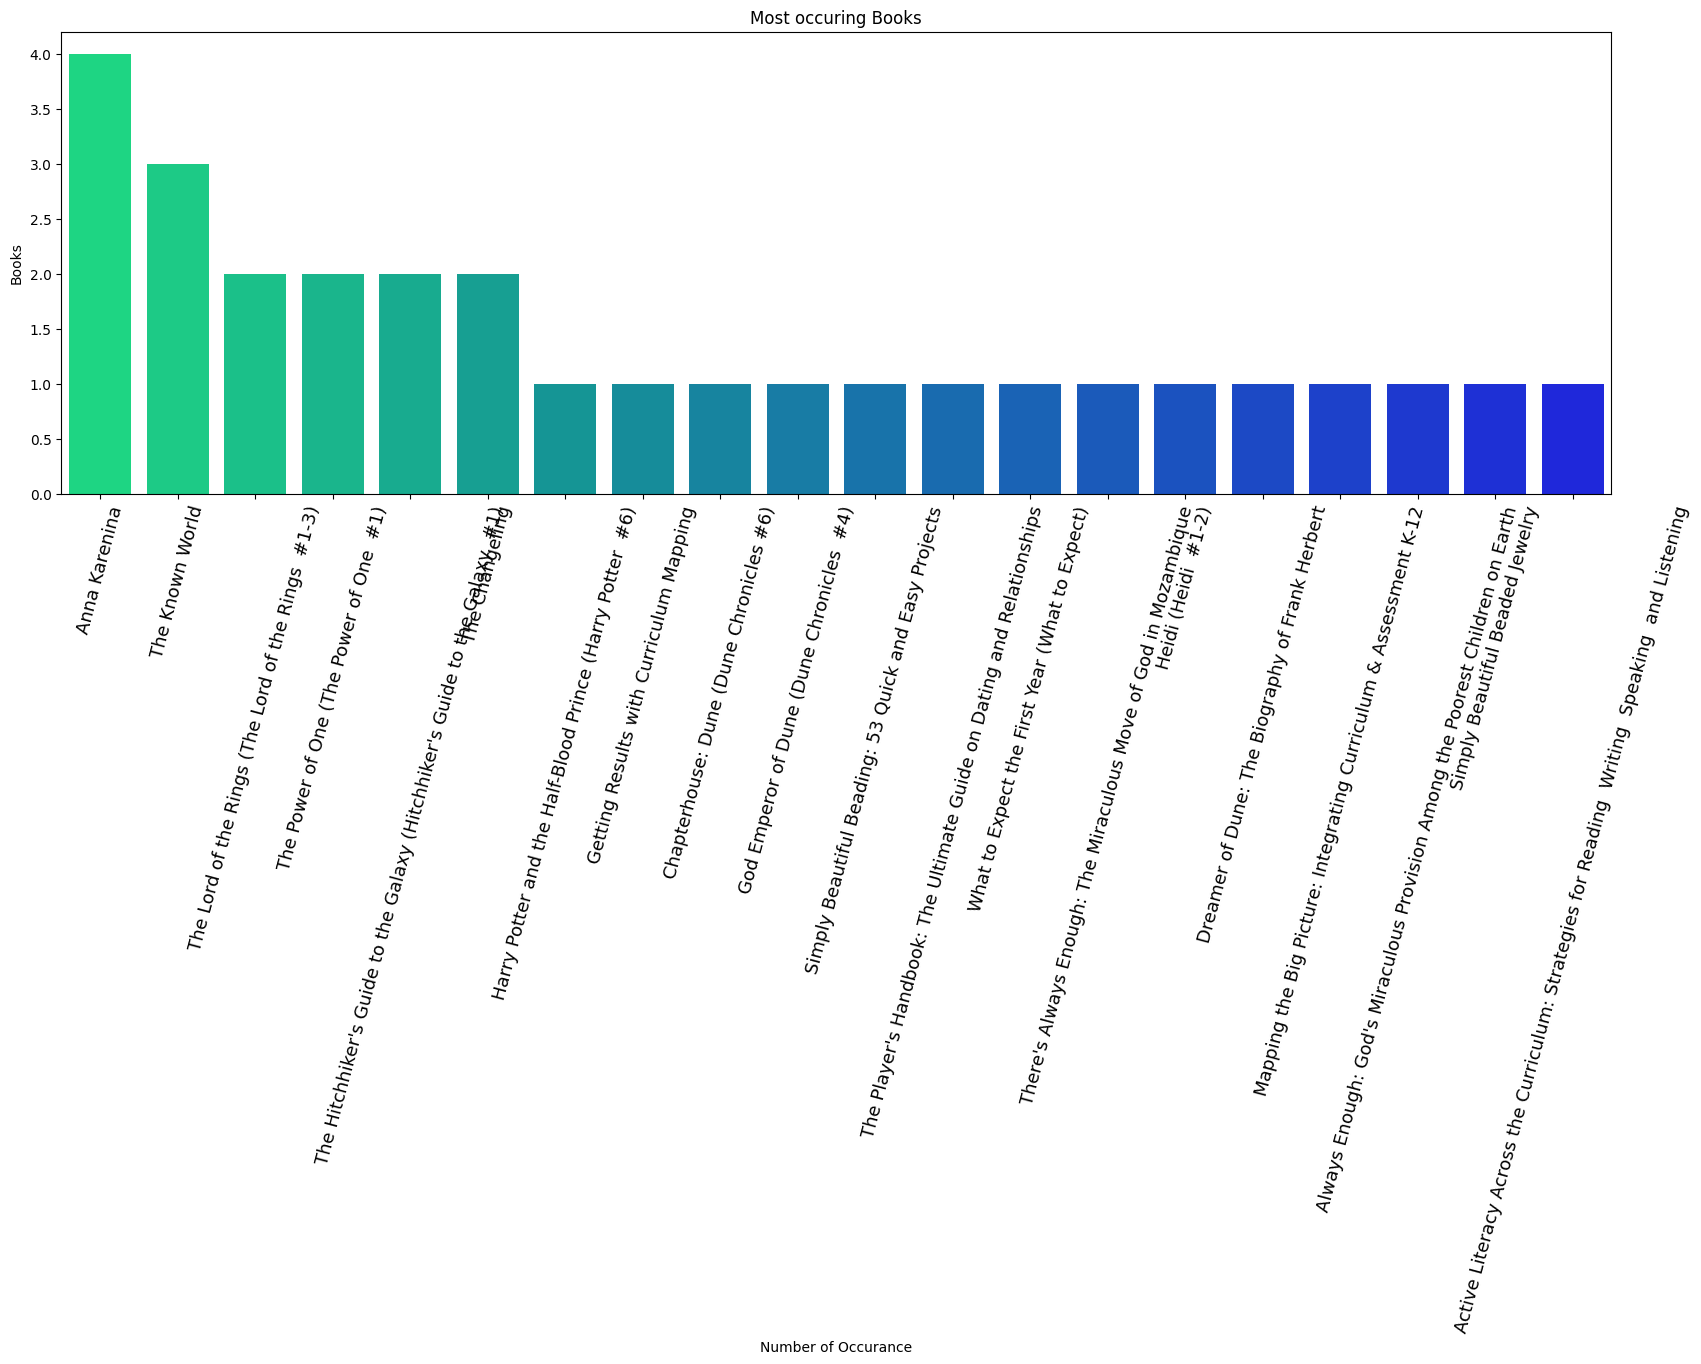

In [145]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

<ipython-input-146-c7a8c5455b40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


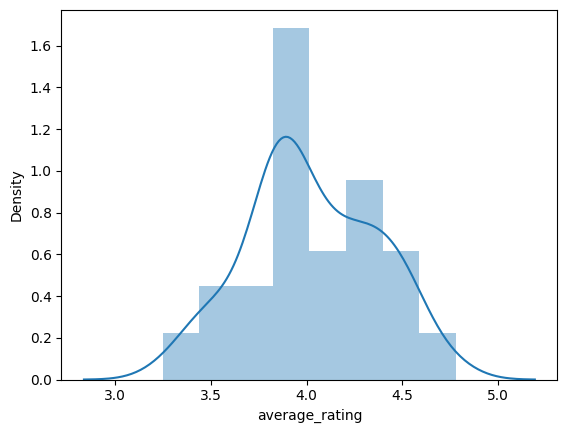

In [146]:
sns.distplot(df['average_rating'])
plt.show()

In [147]:
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr̩,eng,Scholastic


In [148]:
publisher = df['publisher'].value_counts()[:20]
publisher

publisher
Farrar  Straus and Giroux                               8
Wiley                                                   6
Houghton Mifflin Harcourt                               6
Broadway Books                                          5
William Morrow Paperbacks                               5
Ace Books                                               4
Scholastic                                              3
Scholastic Inc.                                         3
Ballantine Books                                        2
Citadel                                                 2
O'Reilly Media                                          2
North Light Books                                       2
Wings Books                                             1
Putnam                                                  1
Association for Supervision & Curriculum Development    1
Kingfisher                                              1
ASCD                                                    1
Sove

<ipython-input-149-186e7592a35e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')


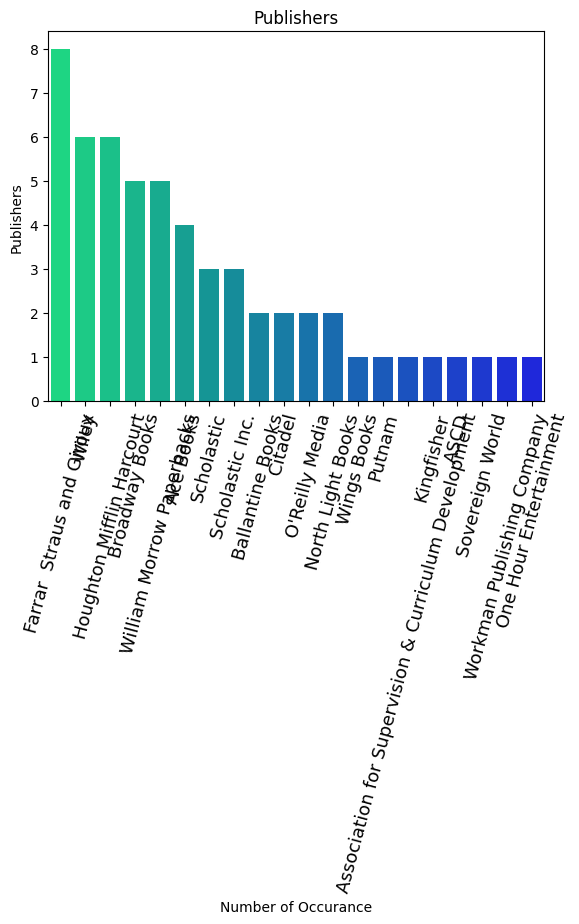

In [149]:
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

In [150]:
#Recommending Books based on Publishers
#Recommending Books based on Authors
#Recommending Books based on Language

In [151]:
df.publisher.value_counts()

publisher
Farrar  Straus and Giroux                                  8
Wiley                                                      6
Houghton Mifflin Harcourt                                  6
Broadway Books                                             5
William Morrow Paperbacks                                  5
Ace Books                                                  4
Scholastic                                                 3
Scholastic Inc.                                            3
Ballantine Books                                           2
Citadel                                                    2
O'Reilly Media                                             2
North Light Books                                          2
Wings Books                                                1
Putnam                                                     1
Association for Supervision & Curriculum Development       1
Kingfisher                                                 1
ASCD          

In [152]:
df.columns


Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [ ]:
def recomd_books_publisheres(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

In [168]:
@interact
def recomd_books_publishers(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Farrar  Straus and Giroux', 'Wiley', 'H…

In [169]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [170]:
@interact
def recomd_books_authors(authors_name = list(df['authors'].value_counts().index)):
    a = df[df['authors'] == authors_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='authors_name', options=('Bill Bryson', 'John McPhee', 'Frank Herbe…

In [171]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [ ]:
@interact
def recomd_books_lang(language = list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == language][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

No charts were generated by quickchart


In [172]:
#DATA PREPROCESSING

In [173]:
df.head()


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr̩,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr̩,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr̩,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr̩,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004.0


In [174]:
def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [175]:
df['rating_obj'].value_counts()

rating_obj
between 3 and 4    49
between 4 and 5    44
Name: count, dtype: int64

In [177]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_obj'],
      dtype='object')

In [178]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,en-US,eng,fre
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [179]:
features = pd.concat([rating_df,language_df, df['average_rating'],
                    df['ratings_count'], df['title']], axis = 1)
features.set_index('title', inplace= True)
features.head()

,between 3 and 4,between 4 and 5,en-US,eng,fre,average_rating,ratings_count
title,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),False,True,False,True,False,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),False,True,False,True,False,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),False,True,False,True,False,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),False,True,False,True,False,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),False,True,False,True,False,4.78,41428


In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [182]:
features_scaled

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 8.62745098e-01, 8.95752612e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 8.10457516e-01, 9.20319852e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 7.64705882e-01, 2.70433270e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 8.56209150e-01, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.77048948e-02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.20261438e-01, 5.55655526e-06],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 9.67320261e-01, 1.20688380e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 7

In [183]:
#MODEL BUILDING


In [184]:
from sklearn import neighbors

In [185]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm = 'ball_tree',
                                  metric = 'euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [186]:
df['title'].value_counts()

title
Anna Karenina                                                                  4
The Known World                                                                3
The Lord of the Rings (The Lord of the Rings  #1-3)                            2
The Power of One (The Power of One  #1)                                        2
The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)    2
                                                                              ..
Hatchet: A Guide for Using "Hatchet" in the Classroom                          1
Hatchet (Brian's Saga  #1)                                                     1
Agile Web Development with Rails: A Pragmatic Guide                            1
The Lord of the Rings: Complete Visual Companion                               1
CliffsNotes on Tolstoy's Anna Karenina                                         1
Name: count, Length: 84, dtype: int64

In [188]:
from ipywidgets import interact
import pandas as pd

# Assuming you have a DataFrame named 'df' containing book information
@interact
def BookRecommender(book_name=list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index.tolist()
    book_id = book_id[0] if book_id else None

    if book_id is not None:
        # Assuming you have a list 'idlist' containing recommendations for each book id
        for newid in idlist[book_id]:
            book_list_name.append(df.iloc[newid].title)

    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('Anna Karenina', 'The Known World', 'The Lord…